In [5]:
import numpy as np # linear algebra
import matplotlib.pyplot as plt
import os, cv2
os.environ["CUDA_VISIBLE_DEVICES"]="1"

from PIL import Image
import jpegio as jio
import tensorflow as tf

In [6]:
coverDir = "Cover/"
JMiPODDir = "data/JMiPOD/"
JUNIWARDDir = "data/JUNIWARD/"
UERDDir = "data/UERD/"


In [7]:
def read_jpeg_dct(file):
    '''
        Reads the jpeg file and its dct coefs
    '''
    data = tf.io.read_file(file)
    img = tf.io.decode_jpeg(data)
    struct_img = jio.read(file)
    dct = np.zeros_like(img)
    no_of_tables = len(struct_img.quant_tables)
    quant = np.zeros(shape=(8,8,no_of_tables)) # assume 8x8 quant tables
    dct[:,:,0] = struct_img.coef_arrays[0]
    dct[:,:,1] = struct_img.coef_arrays[1]
    dct[:,:,2] = struct_img.coef_arrays[2]

    for i in range(no_of_tables):
        quant[:,:,i] = struct_img.quant_tables[i].astype('int16')
    return img, dct, quant
train_filenames = np.array(sorted(os.listdir(coverDir)))
file = train_filenames[1]
cover, cover_dct, cover_quant = read_jpeg_dct(os.path.join(coverDir+file))
jmipod, jmipod_dct, jmipod_quant  = read_jpeg_dct(os.path.join(JMiPODDir+file))
juniward, juniward_dct, juniward_quant  = read_jpeg_dct(os.path.join(JUNIWARDDir+file))
slice_cover_dct = cover_dct[8:16,8:16,:]
slice_jmipod_dct = jmipod_dct[8:16,8:16,:]


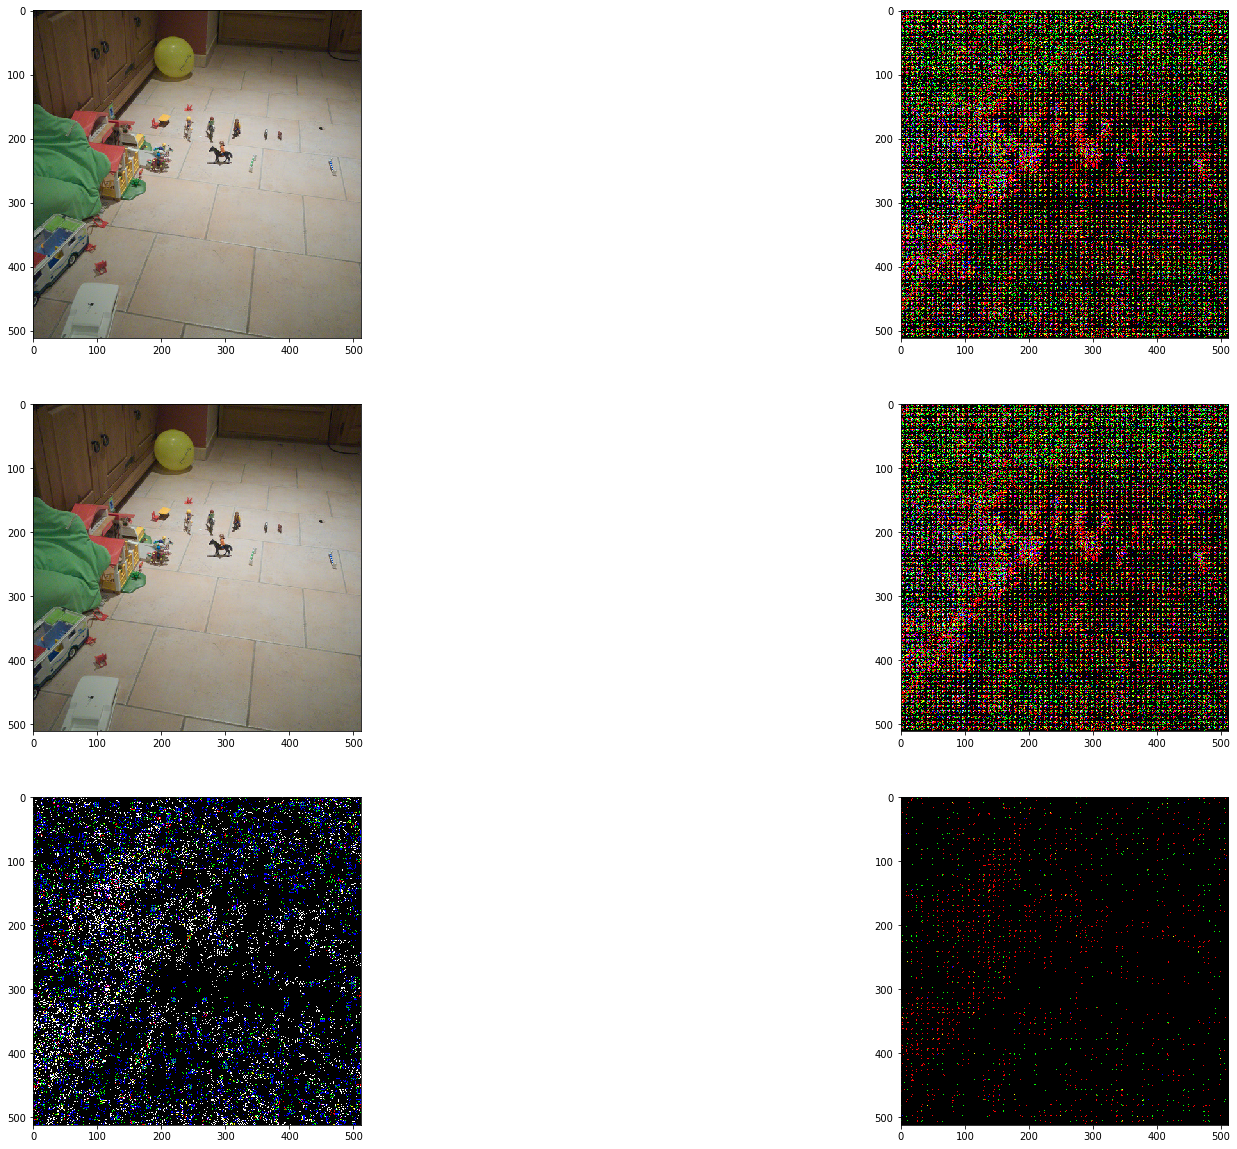

In [8]:
fig, axs = plt.subplots(3,2)
fig.set_size_inches(28.5, 20.5)
axs[0,0].imshow(cover)
axs[0,1].imshow(cover_dct)
axs[1,0].imshow(jmipod)
axs[1,1].imshow(jmipod_dct)
axs[2,0].imshow(cover-jmipod)
axs[2,1].imshow(cover_dct-jmipod_dct)

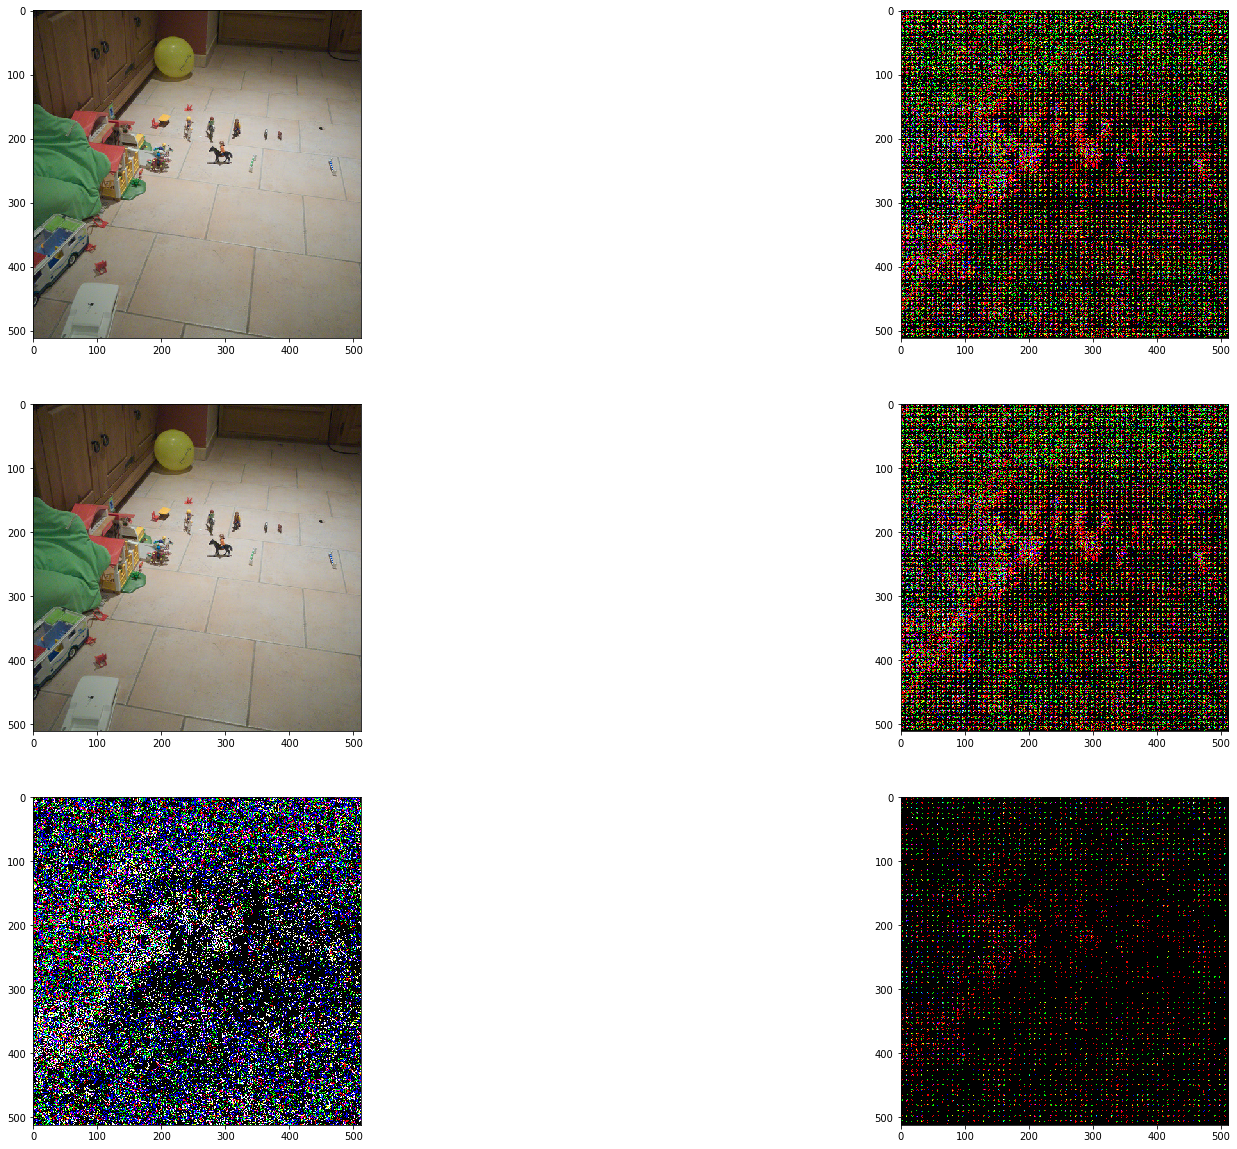

In [9]:
fig, axs = plt.subplots(3,2)
fig.set_size_inches(28.5, 20.5)
axs[0,0].imshow(cover)
axs[0,1].imshow(cover_dct)
axs[1,0].imshow(juniward)
axs[1,1].imshow(juniward_dct)
axs[2,0].imshow(cover-juniward)
axs[2,1].imshow(cover_dct-juniward_dct)



In [2]:
import glob
from utils import *
test_img = np.zeros(shape=(5000,512,512,3))
for ind, file in enumerate(sorted(glob.glob("Test/*.jpg"))):
    img = get_img(file)
    test_img[ind] = img

print('done')



done


In [13]:
import numpy as np
y_pred = np.random.randn(10,4)
print(y_pred)
labels = y_pred.argmax(axis=1)
print(labels)
temp = y_pred[labels != 0, 1:]
new_preds = np.zeros((y_pred.shape[0],))
new_preds[labels != 0] = temp.sum(axis=1)
new_preds[labels == 0] = 1 - y_pred[labels == 0, 0]
y_pred = new_preds
print(y_pred)



[[ 1.04765192  1.08239174 -1.31425184 -2.01689391]
 [ 0.54161069  1.21039052 -0.17482838 -0.34547148]
 [ 1.16527101 -0.70255113 -1.74526284  0.56589807]
 [ 0.79202933  0.40796009 -1.50351406  0.93582355]
 [-2.50557757 -0.88379796  0.3239884  -0.30865723]
 [-0.45052163 -3.46950777 -1.32958218  2.21231133]
 [ 0.77460679 -0.52900133 -1.52527719  0.12495069]
 [ 0.48615291  1.26373137  0.38675693  0.76379962]
 [-1.19866672 -0.5461277  -1.71155134 -0.13836191]
 [-1.25894587  1.43582438 -1.16846186 -0.14011953]]
[1 1 0 3 2 3 0 1 3 1]
[-2.24875401  0.69009067 -0.16527101 -0.15973042 -0.86846678 -2.58677862
  0.22539321  2.41428793 -2.39604096  0.12724299]


In [ ]:
import tensorflow as tf
list_ds = tf.data.Dataset.list_files(str("Test/*"), seed=42, shuffle=False)
for file in list_ds.take(5):
    process_path(file)

